In [2]:
# My Initial Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env environment variiables
from dotenv import load_dotenv
load_dotenv('C:/Users/chefd/OneDrive/Desktop/keys/.env.txt')

True

In [4]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# CREATE THE ALPACA API OBJECT
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [5]:
timeframe = '1Day'

In [6]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp("2017-06-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-22", tz="America/New_York").isoformat()

In [9]:
# Set the tickers
ticker = ["AGG", "SPY"]

In [11]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-06-22 04:00:00+00:00,110.06,110.0947,109.9500,110.03,1427444,7494,110.023476,AGG
2017-06-23 04:00:00+00:00,110.01,110.1085,109.9800,110.05,1259120,6672,110.046967,AGG
2017-06-26 04:00:00+00:00,110.19,110.2400,110.1300,110.15,1914565,7844,110.176342,AGG
2017-06-27 04:00:00+00:00,109.93,109.9800,109.7901,109.82,3072302,11545,109.865556,AGG
2017-06-28 04:00:00+00:00,109.85,109.8800,109.6800,109.86,12184475,9789,109.871051,AGG


In [12]:
df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-15 04:00:00+00:00,377.33,383.900,372.1200,379.20,125004648,1072590,378.050128,SPY
2022-06-16 04:00:00+00:00,370.54,370.940,364.0799,366.65,134508514,906307,368.466260,SPY
2022-06-17 04:00:00+00:00,365.43,369.380,362.1700,365.86,109255759,821350,366.263193,SPY
2022-06-21 04:00:00+00:00,371.90,376.525,371.8100,375.07,76966205,578265,374.376305,SPY
2022-06-22 04:00:00+00:00,370.68,378.720,370.1800,374.39,89625876,604343,375.146941,SPY


In [14]:
# Reorganize the DataFrame
# Separate ticker data
MSFT = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

In [15]:
df_ticker = pd.concat([MSFT, KO],axis=1, keys=['AGG','SPY'])
df_ticker.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-22 04:00:00+00:00  110.06  110.0947  109.9500  110.03   1427444   
2017-06-23 04:00:00+00:00  110.01  110.1085  109.9800  110.05   1259120   
2017-06-26 04:00:00+00:00  110.19  110.2400  110.1300  110.15   1914565   
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-06-22 04:00:00+00:00        7494  110.023476  242.96  243.530  242.640   
2017-06-23 04:00:00+00:00        6672  110.046967  242.88  243.510  242.470   
2017-06-26 04:00:00+00:00        7844  110.176342  243.93  244.380  243.045   
2017-06-27 04:00:00+00:00       11545  109.865556  243.01  243.380  241.310   
2017-06-28 04:00:00+00:00        9789  109.871051  242.51  243.715  242.230   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-06-22 04:00:00+00:00  242.84  44148059      151797  243.061111  
2017-06-23 04:00:00+00:00  243.13  66986801      184119  243.076442  
2017-06-26 04:00:00+00:00  243.29  56700477      178393  243.546607  
2017-06-27 04:00:00+00:00  241.33  82247666      270664  242.289384  
2017-06-28 04:00:00+00:00  243.49  70042599      224934  243.068322

In [16]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [17]:
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 100,
    num_trading_days = 252*30
)

# could only do 100 sinulations computer could not do 500

In [18]:
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2017-06-22 04:00:00+00:00  110.06  110.0947  109.9500  110.03   1427444   
2017-06-23 04:00:00+00:00  110.01  110.1085  109.9800  110.05   1259120   
2017-06-26 04:00:00+00:00  110.19  110.2400  110.1300  110.15   1914565   
2017-06-27 04:00:00+00:00  109.93  109.9800  109.7901  109.82   3072302   
2017-06-28 04:00:00+00:00  109.85  109.8800  109.6800  109.86  12184475   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-22 04:00:00+00:00        7494  110.023476          NaN  242.96   
2017-06-23 04:00:00+00:00        6672  110.046967     0.000182  242.88   
2017-06-26 04:00:00+00:00        7844  110.176342     0.000909  243.93   
2017-06-27 04:00:00+00:00       11545  109.865556    -0.002996  243.01   
2017-06-28 04:00:00+00:00        9789  109.871051     0.000364  242.51   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2017-06-22 04:00:00+00:00  243.530  242.640  242.84  44148059      151797   
2017-06-23 04:00:00+00:00  243.510  242.470  243.13  66986801      184119   
2017-06-26 04:00:00+00:00  244.380  243.045  243.29  56700477      178393   
2017-06-27 04:00:00+00:00  243.380  241.310  241.33  82247666      270664   
2017-06-28 04:00:00+00:00  243.715  242.230  243.49  70042599      224934   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-22 04:00:00+00:00  243.061111          NaN  
2017-06-23 04:00:00+00:00  243.076442     0.001194  
2017-06-26 04:00:00+00:00  243.546607     0.000658  
2017-06-27 04:00:00+00:00  242.289384    -0.008056  
2017-06-28 04:00:00+00:00  243.068322     0.008950

In [19]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004653,1.004609,1.004508,1.014042,0.996606,1.002461,0.992556,0.998832,0.996469,0.997410,...,1.007932,1.009285,1.001808,0.987168,0.994108,1.001795,0.999797,1.003508,0.997330,0.996895
2,1.005424,1.019612,1.010287,1.007961,0.996684,1.000292,0.995761,1.000387,0.990524,0.997577,...,1.011249,1.010318,1.003057,0.989033,0.992598,0.991830,0.995044,0.998288,1.000874,1.003135
3,0.996632,1.023416,1.008155,1.008218,0.994813,1.007928,1.000951,1.018534,0.996729,1.004096,...,1.015402,1.008744,1.004564,0.986807,0.991431,0.993869,0.984113,1.004580,1.003153,1.000094
4,1.000636,1.020636,1.010628,1.007125,0.985783,1.005723,1.008931,1.019767,1.010418,1.011836,...,1.018638,1.017276,0.994645,0.992134,0.984030,0.980315,0.990911,1.005906,1.003920,1.008319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.579151,2.072681,1.561761,3.582470,1.345004,1.718276,1.121656,1.217837,1.923553,1.292054,...,1.653739,3.181605,3.530910,3.049092,4.286680,3.758352,4.762742,3.912858,1.646052,2.135839
7557,4.564980,2.079531,1.568375,3.597324,1.350457,1.716872,1.131344,1.224599,1.905500,1.272181,...,1.656206,3.186713,3.523232,3.068872,4.274413,3.768252,4.764832,3.927189,1.646523,2.117809
7558,4.528686,2.079224,1.566749,3.590289,1.350640,1.715448,1.141590,1.221593,1.916828,1.270219,...,1.652663,3.190124,3.526653,3.085162,4.246817,3.775191,4.800294,3.936561,1.663966,2.119239
7559,4.502249,2.057068,1.567129,3.599394,1.362060,1.727470,1.135846,1.219189,1.927009,1.261358,...,1.665864,3.179670,3.510723,3.076962,4.234355,3.798164,4.817345,3.915999,1.675078,2.105607


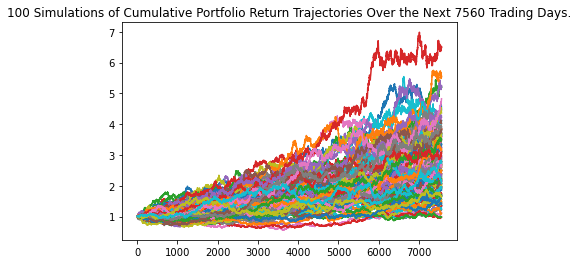

In [20]:
line_plot = MC_thirtyyear.plot_simulation()

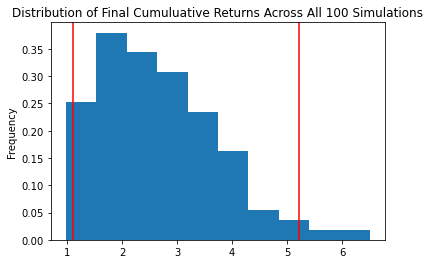

In [21]:
line_plot = MC_thirtyyear.plot_distribution()

In [22]:
tbl = MC_thirtyyear.summarize_cumulative_return()

C:\Users\chefd\OneDrive\Desktop\jupyter_file\files\MCForecastTools.py:178: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [23]:
print(tbl)

count           100.000000
mean              2.681557
std               1.091025
min               0.979051
25%               1.920357
50%               2.496097
75%               3.482450
max               6.508586
95% CI Lower      1.117990
95% CI Upper      5.215098
Name: 7560, dtype: float64


In [26]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22359.8 and $104301.97


In [33]:
 # Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
# Set initial investment
initial_investment = 20000 * 1.5
print(f"the initial investment is, ${initial_investment}")



the initial investment is, $30000.0


In [34]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33539.7 and $156452.95
